## **Making a LArCV file for 2x2 using flow2supera**

## I. Introduction and Workflow

<div>
    <br>
    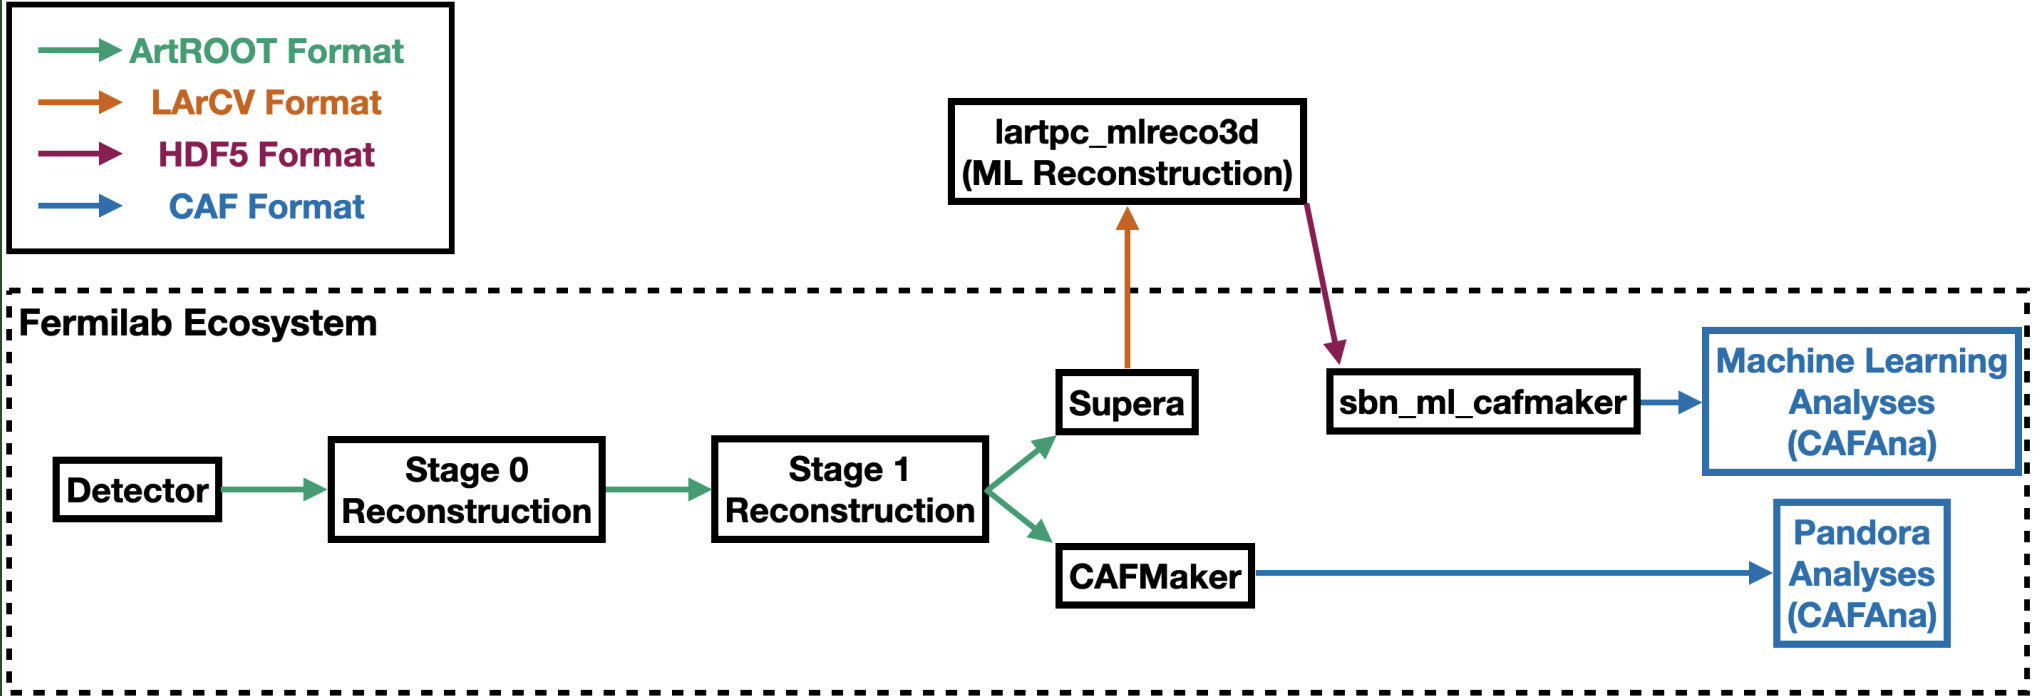
    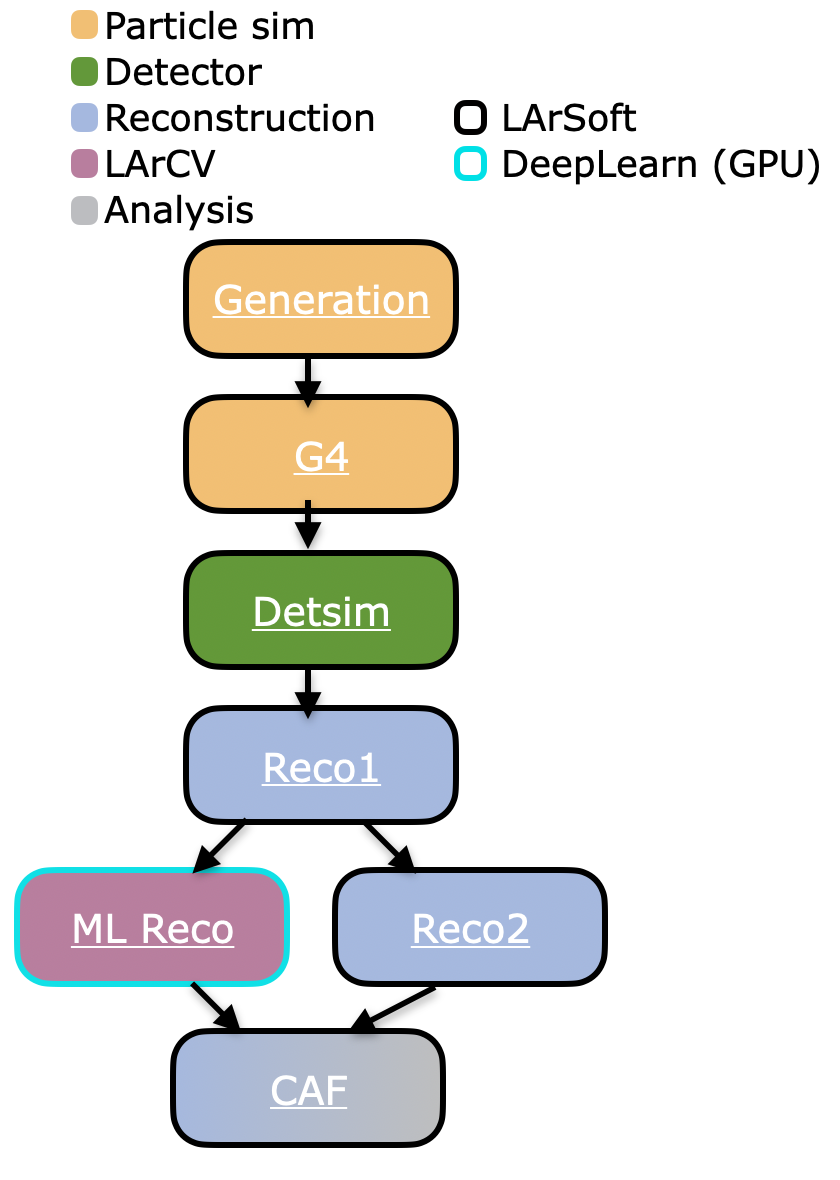
    <figcaption style="text-align: center; font-size: 24px;">ICARUS (left) and SBND (right) software chain</figcaption>
</div>

## II. Setup
Sorry 2x2 people, LArSoft is nearly impossible to setup outside of the fermilab computers...
- ssh into a fermilab gpvm (i.e. `sbndgpvm04.fnal.gov`)
- Copy setup script `cp /exp/sbnd/data/users/brindenc/ML/spine_workshop2024/setup.sh /path/to/your/work/area`
- Copy custom config fcls `cp /exp/sbnd/data/users/brindenc/ML/spine_workshop2024/*.fcl /path/to/your/work/area`
- If on AL9 run `sh /exp/$(id -ng)/data/users/vito/podman/start_SL7dev.sh`
- Run setup script `source setup.sh` #sets up SBND stack and Supera config



## III. Run

We will be running using `sbn(d)code v09_90_00`. 

### Run simulation (optional)
You can run the production simulation like this, but we will focus on running supera
```shell
lar -c run_mpvmpr_sbnd.fcl -n 1 #particle bomb simulation (one event)
lar -c g4_sce_lite.fcl -s prodmpvmpr_sbnd_MPVMPR*.root #particle propogation simulation
lar -c detsim_sce_lite.fcl -s prodmpvmpr_sbnd_MPVMPR*G4*.root #detector simulation
lar -c reco1_mpvmpr.fcl -s prodmpvmpr_sbnd_MPVMPR*G4*DetSim*.root #signal processing and space point production
```

Takes ~1.5 min to run and process a mpvmpr event using the workflow above.

### Run supera
The path to the `reco1` data is at `/exp/sbnd/data/users/brindenc/ML/spine_workshop2024/` on any fermilab machine. If you didn't run the steps above 
```shell
lar -c run_supera_sbnd_mpvmpr.fcl -s prodmpvmpr_sbnd_MPVMPR*G4*DetSim*Reco1*.root #supera label making
```

This will produce a `larcv.root` file, who's contents will be covered in this workshop [here](https://github.com/DeepLearnPhysics/spine_workshop_2024/blob/main/basics/larcv/LArCV_visualization.ipynb)

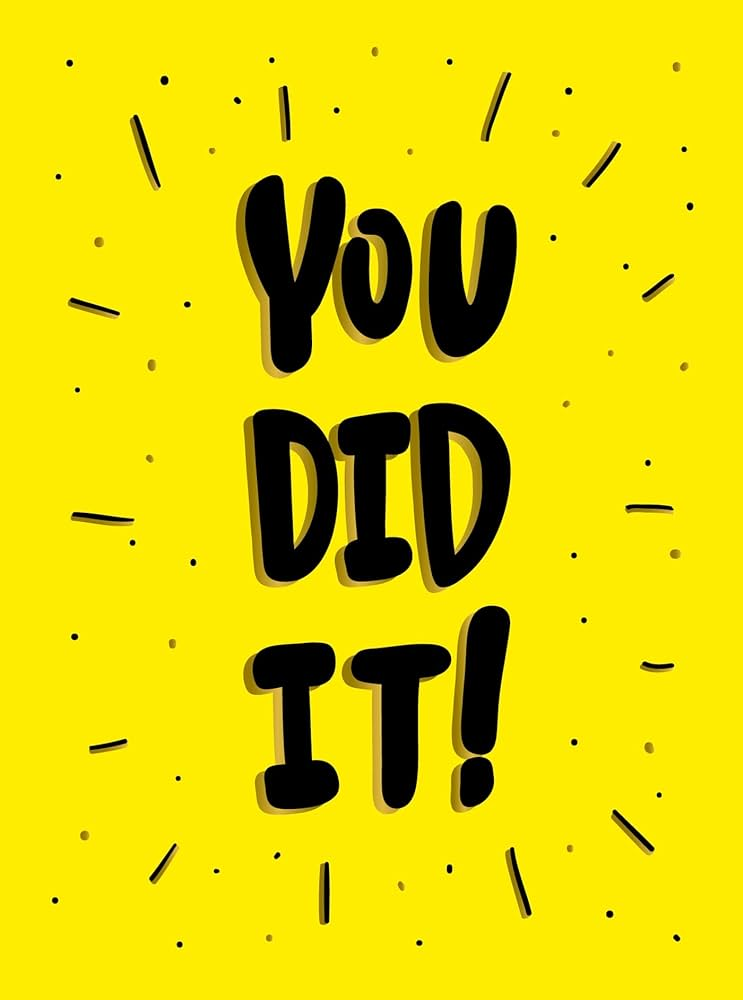